In [1]:
# PREPROCESS....

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# USING FUNCTION TO HANDLE_OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


# DATASET
df = pd.read_csv(r'C:\Users\nh013\Desktop\global air polution data.csv\global air pollution dataset.csv')

# FEATURE SELECTION
df = df[['Country','City','AQI Value','AQI Category','CO AQI Value','CO AQI Category','Ozone AQI Value','Ozone AQI Category','NO2 AQI Value','NO2 AQI Category','PM2.5 AQI Value','PM2.5 AQI Category']]

#REMOVE ANY LEADING AND TRAILING SPACE FROM COLUMN
df.columns = df.columns.str.strip()

# REMOVE DUBLICATE ROWS
df.drop_duplicates(inplace=True)

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

# HANDLE OUTLIERS
df = handle_outliers(df, 'AQI Value')

# LEBEL ENCODE
label_encoder = LabelEncoder()
categorical_cols = ['Country', 'City', 'AQI Category', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category']
df[categorical_cols] = df[categorical_cols].apply(label_encoder.fit_transform)

# NORMALIZE AND SCALING ALL NUMERICAL COLUMN
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

print(df.head())

    Country      City  AQI Value  AQI Category  CO AQI Value  CO AQI Category  \
0  0.658667  0.704419  -0.186657      0.668442     -0.133114              0.0   
1 -1.427916  0.707684  -0.591615     -0.954560     -0.133114              0.0   
2 -0.364561  0.713182   0.420781      0.668442     -0.133114              0.0   
3  0.558351  0.718853  -0.875086     -0.954560     -0.133114              0.0   
4 -0.785890  0.730193  -1.361037     -0.954560     -1.427654              0.0   

   Ozone AQI Value  Ozone AQI Category  NO2 AQI Value  NO2 AQI Category  \
0         0.350991           -0.235889      -0.606905               0.0   
1        -1.581843           -0.235889      -0.385482               0.0   
2         0.538039           -0.235889      -0.164058               0.0   
3         0.226292           -0.235889      -0.606905               0.0   
4        -0.521902           -0.235889      -0.606905               0.0   

   PM2.5 AQI Value  PM2.5 AQI Category  
0        -0.062073   

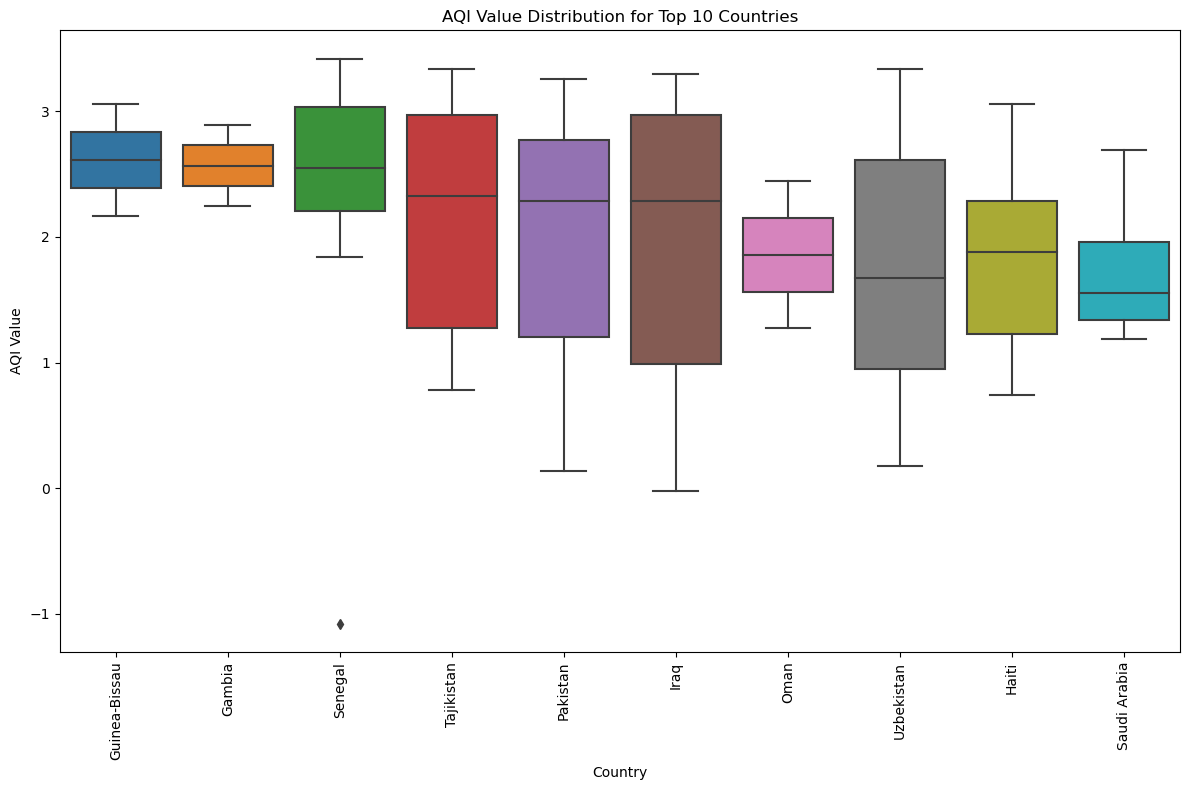

In [2]:
# top 10 countries AQI value visualize

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# USING FUNCTION TO HANDLE_OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATASET
df = pd.read_csv(r'C:\Users\nh013\Desktop\global air polution data.csv\global air pollution dataset.csv')

# FEATURE SELECTION
df = df[['Country','City','AQI Value','AQI Category','CO AQI Value','CO AQI Category','Ozone AQI Value','Ozone AQI Category','NO2 AQI Value','NO2 AQI Category','PM2.5 AQI Value','PM2.5 AQI Category']]


#REMOVE ANY LEADING AND TRAILING SPACE FROM COLUMN

df.columns = df.columns.str.strip()


# REMOVE DUBLICATE ROWS
df.drop_duplicates(inplace=True)



# DROP ROWS WITH MISSING VALUES

df.dropna(inplace=True)


# HANDLE OUTLIERS
df = handle_outliers(df, 'AQI Value')

# ONE HOT ENCODING
df = pd.get_dummies(df, columns=['AQI Category','CO AQI Category','Ozone AQI Category','NO2 AQI Category','PM2.5 AQI Category'])

# NORMALIZE AND SCALING ALL NUMERICAL COLUMN
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Get the top 10 countries based on AQI value mean
top_10_countries = df.groupby('Country')['AQI Value'].mean().nlargest(10).index


df_top_10_countries = df[df['Country'].isin(top_10_countries)]

# Create a scientific diagram of AQI value over the top 10 countries
plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='AQI Value', data=df_top_10_countries, order=top_10_countries)
plt.xlabel('Country')
plt.ylabel('AQI Value')
plt.title('AQI Value Distribution for Top 10 Countries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

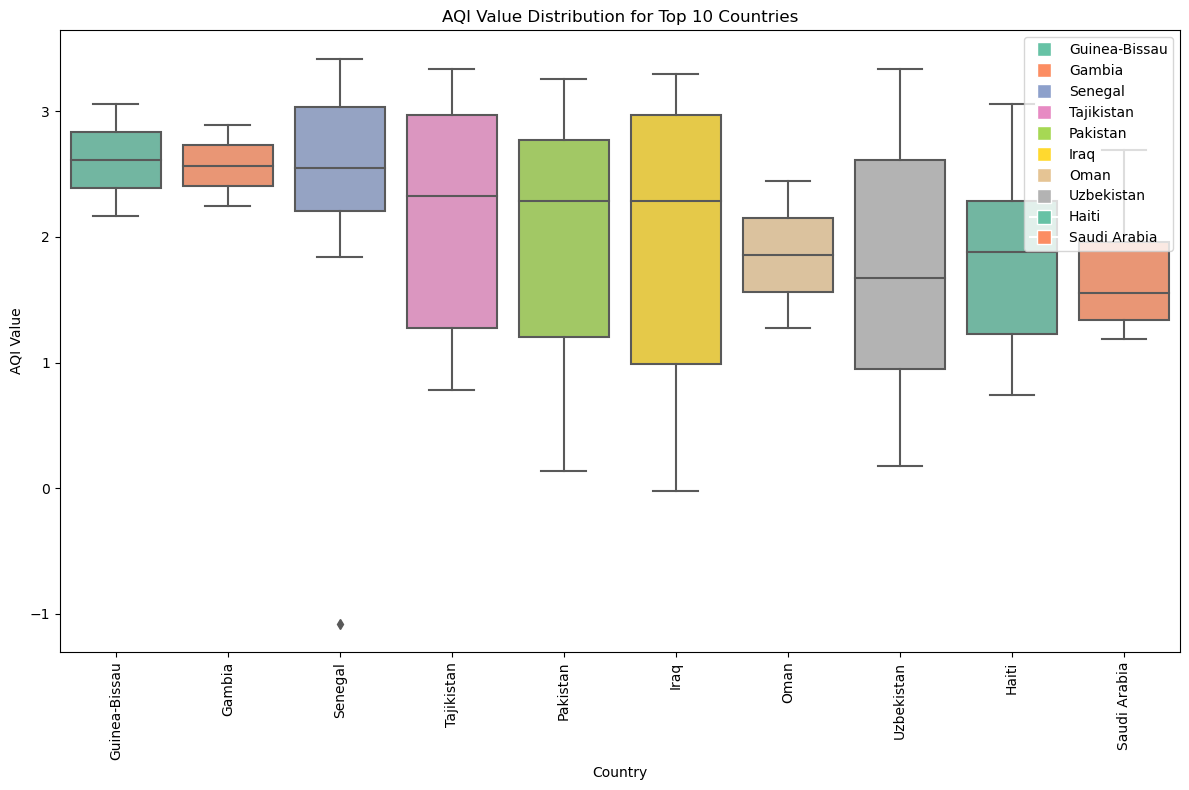

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# USING FUNCTION TO HANDLE_OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATASET
df = pd.read_csv(r'C:\Users\nh013\Desktop\global air polution data.csv\global air pollution dataset.csv')

# FEATURE SELECTION
df = df[['Country','City','AQI Value','AQI Category','CO AQI Value','CO AQI Category','Ozone AQI Value','Ozone AQI Category','NO2 AQI Value','NO2 AQI Category','PM2.5 AQI Value','PM2.5 AQI Category']]


#REMOVE ANY LEADING AND TRAILING SPACE FROM COLUMN
df.columns = df.columns.str.strip()


# REMOVE DUBLICATE ROWS
df.drop_duplicates(inplace=True)

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)


# HANDLE OUTLIERS
df = handle_outliers(df, 'AQI Value')

# ONE HOT  ENCODEING
df = pd.get_dummies(df, columns=['AQI Category','CO AQI Category','Ozone AQI Category','NO2 AQI Category','PM2.5 AQI Category'])

# NORMALIZE AND SCALING ALL NUMERICAL COLUMN
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Get the top 10 countries based on AQI value mean
top_10_countries = df.groupby('Country')['AQI Value'].mean().nlargest(10).index


df_top_10_countries = df[df['Country'].isin(top_10_countries)]

# SET CUSTOM COLOR FOR BOX
custom_colors = sns.color_palette("Set2", len(top_10_countries))

# BUILD SCIENTIFIC DIAGRAM
plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='AQI Value', data=df_top_10_countries, order=top_10_countries, palette=custom_colors)

#  COLOR MEANING LEGEND
legend_labels = top_10_countries
legend_handles = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=custom_colors[i], markersize=10) for i in range(len(top_10_countries))]
plt.legend(legend_handles, legend_labels, loc='upper right')

plt.xlabel('Country')
plt.ylabel('AQI Value')
plt.title('AQI Value Distribution for Top 10 Countries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [4]:
# PRINT ALL COUNTRIES

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# USING FUNCTION TO HANDLE_OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


# DATASET
df = pd.read_csv(r'C:\Users\nh013\Desktop\global air polution data.csv\global air pollution dataset.csv')

# FEATURE SELECTION
df = df[['Country','City','AQI Value','AQI Category','CO AQI Value','CO AQI Category','Ozone AQI Value','Ozone AQI Category','NO2 AQI Value','NO2 AQI Category','PM2.5 AQI Value','PM2.5 AQI Category']]

# REMOVE ANY LEADING AND TRAILING SPACE FROM COLUMN
df.columns = df.columns.str.strip()

# REMOVE DUBLICATE ROWS
df.drop_duplicates(inplace=True)


# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

# HANDLE OUTLIERS
df = handle_outliers(df, 'AQI Value')

# LABEL ENCODING
label_encoder = LabelEncoder()
categorical_cols = ['AQI Category', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category']
df[categorical_cols] = df[categorical_cols].apply(label_encoder.fit_transform)

# NORMALIZE AND SCALING ALL NUMERICAL COLUMN
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])



unique_countries = df['Country'].unique()
print("Unique Countries:")
for country in unique_countries:
    print(country)

Unique Countries:
Russian Federation
Brazil
Italy
Poland
France
United States of America
Germany
Belgium
China
Netherlands
Republic of North Macedonia
India
Colombia
Romania
Indonesia
Finland
South Africa
United Kingdom of Great Britain and Northern Ireland
United Republic of Tanzania
Egypt
Haiti
Somalia
Philippines
Latvia
Chad
New Zealand
Tunisia
Viet Nam
Mexico
Japan
El Salvador
Bulgaria
Nigeria
South Sudan
Guatemala
Ireland
Turkey
Peru
Democratic Republic of the Congo
Canada
Switzerland
Denmark
Cameroon
Australia
Portugal
Côte d'Ivoire
Sweden
Ethiopia
Thailand
Hungary
Iran (Islamic Republic of)
Kazakhstan
Israel
Spain
Papua New Guinea
Madagascar
Lithuania
Ghana
Azerbaijan
Armenia
Ukraine
Malaysia
Serbia
Slovakia
Gambia
Pakistan
Ecuador
Bosnia and Herzegovina
Czechia
Argentina
Dominican Republic
Guinea
Bolivia (Plurinational State of)
Bangladesh
Sudan
Chile
Panama
Congo
Kyrgyzstan
Mauritius
Greece
Malawi
Cuba
Saudi Arabia
Benin
Sierra Leone
Lebanon
Uruguay
Namibia
Albania
Guyana
Leso

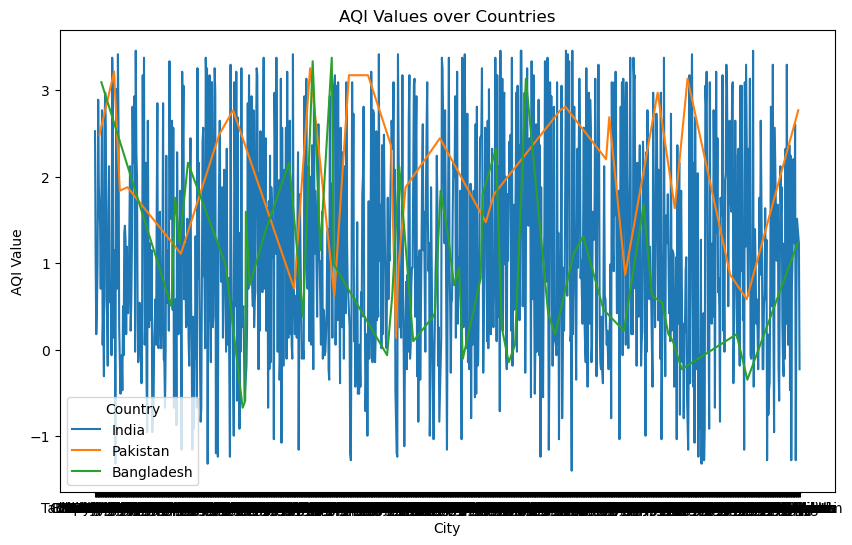

In [5]:
# plot AQI value over bangladesh, pakistan, india

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# USING FUNCTION TO HANDLE_OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


# DATASET
df = pd.read_csv(r'C:\Users\nh013\Desktop\global air polution data.csv\global air pollution dataset.csv')

# FEATURE SELECTION
df = df[['Country','City','AQI Value','AQI Category','CO AQI Value','CO AQI Category','Ozone AQI Value','Ozone AQI Category','NO2 AQI Value','NO2 AQI Category','PM2.5 AQI Value','PM2.5 AQI Category']]

# REMOVE ANY LEADING AND TRAILING SPACE FROM COLUMN
df.columns = df.columns.str.strip()

# REMOVE DUBLICATE ROWS
df.drop_duplicates(inplace=True)

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

# HANDLE OUTLIERS
df = handle_outliers(df, 'AQI Value')

# LABEL ENCODING
label_encoder = LabelEncoder()
categorical_cols = ['AQI Category', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category']
df[categorical_cols] = df[categorical_cols].apply(label_encoder.fit_transform)

# NORMALIZE AND SCALING ALL NUMERICAL COLUMN
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])


# FILTER THE DATAFRAME FOR THE SPECIFIC COUNTRIES
countries = ['Bangladesh', 'Pakistan', 'India']
filtered_df = df[df['Country'].isin(countries)]


plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_df, x='City', y='AQI Value', hue='Country')
plt.xlabel('City')
plt.ylabel('AQI Value')
plt.title('AQI Values over Countries')
plt.show()


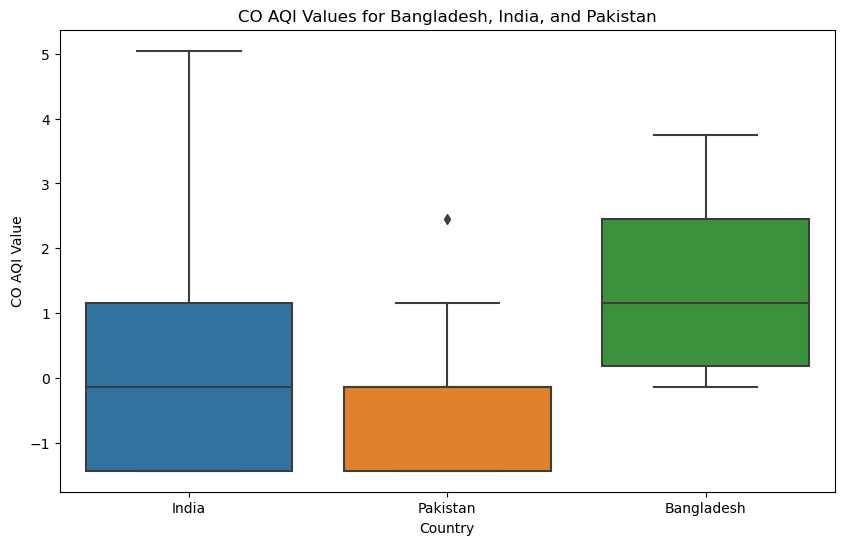

In [6]:
# visualize Co AQI value over bangladesh india  pakistan

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# USING FUNCTION TO HANDLE_OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


# DATASET
df = pd.read_csv(r'C:\Users\nh013\Desktop\global air polution data.csv\global air pollution dataset.csv')

# FEATURE SELECTION
df = df[['Country','City','AQI Value','AQI Category','CO AQI Value','CO AQI Category','Ozone AQI Value','Ozone AQI Category','NO2 AQI Value','NO2 AQI Category','PM2.5 AQI Value','PM2.5 AQI Category']]

# REMOVE ANY LEADING AND TRAILING SPACE FROM COLUMN
df.columns = df.columns.str.strip()

# REMOVE DUBLICATE ROWS
df.drop_duplicates(inplace=True)


# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

# HANDLE OUTLIERS
df = handle_outliers(df, 'AQI Value')

# LEBEL ENCODING
label_encoder = LabelEncoder()
categorical_cols = ['AQI Category', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category']
df[categorical_cols] = df[categorical_cols].apply(label_encoder.fit_transform)

# NORMALIZE AND SCALING ALL NUMERICAL COLUMN
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])


# FILTER THE DATAFRAME FOR THE SPECIFIC COUNTRIES
countries = ['Bangladesh', 'Pakistan', 'India']
filtered_df = df[df['Country'].isin(countries)]

# PLOT CO-AQI VALUE
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='Country', y='CO AQI Value')
plt.xlabel('Country')
plt.ylabel('CO AQI Value')
plt.title('CO AQI Values for Bangladesh, India, and Pakistan')
plt.show()